In [2]:
# Install necessary packages

In [3]:
!pip install PyPDF2 textblob nltk matplotlib  # Install required packages for PDF reading, text analysis, and visualization


In [4]:
import PyPDF2  # Import PyPDF2 for reading PDF files

In [5]:
import os  # Import os for file and directory operations

In [6]:
import re  # Import re for regular expressions

In [7]:
import nltk  # Import nltk for natural language processing

In [8]:
from nltk.corpus import stopwords  # Import stopwords for removing common words from text

In [9]:
from nltk.tokenize import word_tokenize  # Import word_tokenize for splitting text into words

In [10]:
from collections import Counter  # Import Counter for counting word frequencies

In [11]:
import matplotlib.pyplot as plt  # Import matplotlib for plotting graphs

In [12]:
from textblob import TextBlob  # Import TextBlob for sentiment analysis

In [13]:
# Ensure required NLTK data is downloaded

In [15]:
nltk.download('punkt')  # Download the punkt tokenizer models

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
nltk.download('stopwords')  # Download the stopwords corpus

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
# Path to the PDF file

In [18]:
pdf_path = "/content/ERIC MWANIKI  DS & ML RESUME.pdf"  # Define the path to the PDF file

In [19]:
# Directory to save results

In [20]:
output_dir = "/content/resume_analysis/"  # Define the directory to save results

In [21]:
os.makedirs(output_dir, exist_ok=True)  # Create the directory if it doesn't exist

In [22]:
# Read PDF file and extract text

In [23]:
text = ""  # Initialize an empty string to hold the text

In [24]:
with open(pdf_path, "rb") as file:  # Open the PDF file in binary read mode
    reader = PyPDF2.PdfReader(file)  # Create a PdfReader object
    for page in reader.pages:  # Iterate through each page in the PDF
        text += page.extract_text()  # Extract text from the page and append to the text variable

In [25]:
# Display extracted text

In [26]:
print("Extracted Text:")  # Print header for extracted text
print(text[:2000])  # Displaying first 2000 characters for brevity

Extracted Text:
ERIC MWANIKI RESUME  
 
Eric Mwaniki  
P.O. BOX 90420 -80100, Mombasa, Kenya  
Email: ericmwaniki2004@gmail.com  
GitHub: https://github.com/Eric428 -a 
 
Objective : 
To leverage my strong foundation in Civil Engineering with advanced skills in data science and 
machine learning to drive innovation and efficiency in infrastructure development and 
management.  
 
Education:  
Online Data Science and Machine Learning Studies  
Kaggle and Udemy, Completed in May 2023  
 Gained comprehen sive knowledge in data science, machine learning, and statistical 
analysis.  
 Executed hands -on projects demonstrating practical application of data science skills.  
 
Bachelor of Science in Civil Engineering  
Technical University of Mombasa, Mombasa, Kenya  
Expected Graduation: 2028  
 
Relevant Coursework : 
Computer programming  
CAD Drafting and Programming  
Structural Analysis  
Geotechnical Engineering  
Fluid Mechanics  Construction Management  
 
Integration of Data Scien

In [27]:
# Clean and process text

In [28]:
text = re.sub(r'\s+', ' ', text).strip()  # Replace multiple whitespace characters with a single space and strip leading/trailing spaces


In [29]:
words = word_tokenize(text.lower())  # Tokenize the text into words and convert to lowercase

In [30]:
words = [word for word in words if word.isalnum() and word not in stopwords.words('english')]  # Remove non-alphanumeric words and stopwords


In [31]:
# Display cleaned words

In [32]:
print("\nCleaned Words Sample:")  # Print header for cleaned words
print(words[:50])  # Displaying first 50 cleaned words


Cleaned Words Sample:
['eric', 'mwaniki', 'resume', 'eric', 'mwaniki', 'box', '90420', 'mombasa', 'kenya', 'email', 'ericmwaniki2004', 'github', 'https', 'objective', 'leverage', 'strong', 'foundation', 'civil', 'engineering', 'advanced', 'skills', 'data', 'science', 'machine', 'learning', 'drive', 'innovation', 'efficiency', 'infrastructure', 'development', 'management', 'education', 'online', 'data', 'science', 'machine', 'learning', 'studies', 'kaggle', 'udemy', 'completed', 'may', '2023', 'gained', 'comprehen', 'sive', 'knowledge', 'data', 'science', 'machine']


In [33]:
# Count word frequency

In [34]:
word_freq = Counter(words)  # Count the frequency of each word

In [35]:
most_common_words = word_freq.most_common(20)  # Get the 20 most common words

In [36]:
# Display most common words

In [39]:
print("\nMost Common Words:")  # Print header for most common words
for word, freq in most_common_words:  # Iterate through the most common words
    print(f"{word}: {freq}")  # Print each word and its frequency


Most Common Words:
data: 32
learning: 21
machine: 18
science: 13
analysis: 9
content: 8
projects: 7
project: 7
engineering: 6
programming: 6
predictive: 6
statistical: 5
techniques: 5
present: 5
models: 5
model: 5
advanced: 4
skills: 4
development: 4
management: 4


In [40]:
# Plot most common words

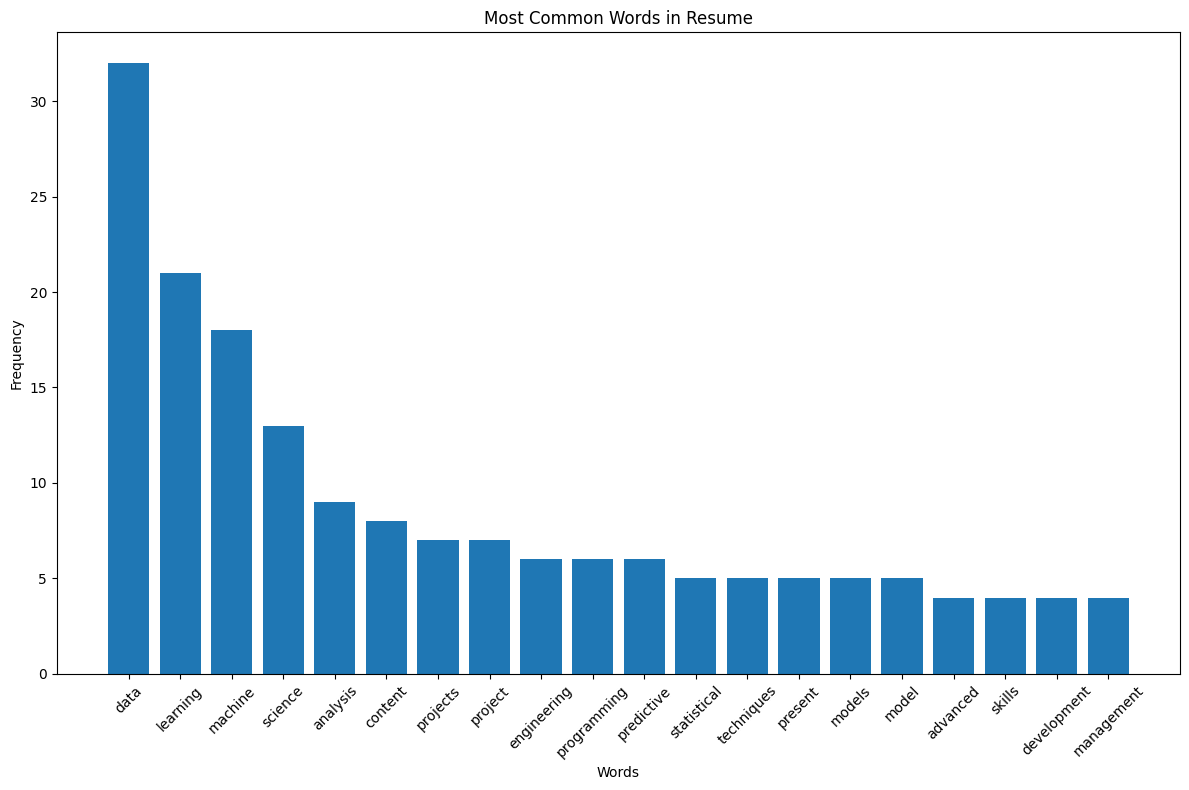

In [41]:
plt.figure(figsize=(12, 8))  # Create a figure with a specific size
plt.bar([word[0] for word in most_common_words], [word[1] for word in most_common_words])  # Create a bar chart
plt.title('Most Common Words in Resume')  # Set the title of the plot
plt.xlabel('Words')  # Set the x-axis label
plt.ylabel('Frequency')  # Set the y-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()  # Display the plot

In [42]:
# Extract sections from text with error handling

In [43]:
def extract_section(title):  # Define a function to extract sections
    pattern = re.compile(rf'{title}:(.*?)(Objective:|Education:|Experience:|Skills:|Projects:|Achievements:|References:|$)', re.S)  # Compile a regex pattern to extract the section
    match = pattern.search(text)  # Search for the pattern in the text
    return match.group(1).strip() if match else "Not Found"  # Return the section content if found, otherwise return "Not Found"


In [44]:
sections = {  # Dictionary to hold extracted sections
    "Objective": extract_section("Objective"),  # Extract the Objective section
    "Education": extract_section("Education"),  # Extract the Education section
    "Experience": extract_section("Experience"),  # Extract the Experience section
    "Skills": extract_section("Skills"),  # Extract the Skills section
    "Projects": extract_section("Projects"),  # Extract the Projects section
    "Achievements": extract_section("Achievements"),  # Extract the Achievements section
    "References": extract_section("References"),  # Extract the References section
}

In [45]:
# Display and save sections

In [46]:
for section, content in sections.items():  # Iterate through each section and its content
    print(f"\n{section} Section:")  # Print header for the section
    print(content[:500])  # Displaying first 500 characters for brevity

    # Save each section to a text file
    with open(os.path.join(output_dir, f"{section.lower()}.txt"), "w") as file:  # Open a file to write the section content
        file.write(content)  # Write the section content to the file


Objective Section:
Not Found

Education Section:
Online Data Science and Machine Learning Studies Kaggle and Udemy, Completed in May 2023  Gained comprehen sive knowledge in data science, machine learning, and statistical analysis.  Executed hands -on projects demonstrating practical application of data science skills. Bachelor of Science in Civil Engineering Technical University of Mombasa, Mombasa, Kenya Expected Graduation: 2028 Relevant Coursework : Computer programming CAD Drafting and Programming Structural Analysis Geotechnical Engine

Experience Section:
Chief Conten t Officer Ignitus Organization July 2024 - Present  Oversee the development and implementation of content strategies that integrate machine learning models to enhance content personalization and engagement.  Lead a team of content creators, data analysts, and machine learning engineers to develop data -driven content solutions.  Design and deploy machine learning algorithms for content recommendation, user en

In [47]:
# Perform sentiment analysis

In [48]:
sentiment_scores = {}  # Dictionary to hold sentiment scores for each section

In [49]:
for section, content in sections.items():  # Iterate through each section and its content
    blob = TextBlob(content)  # Create a TextBlob object for sentiment analysis
    sentiment_scores[section] = {  # Store sentiment scores for the section
        "Polarity": blob.sentiment.polarity,  # Get polarity score
        "Subjectivity": blob.sentiment.subjectivity  # Get subjectivity score
    }

In [50]:
# Display sentiment scores

In [51]:
print("\nSentiment Analysis Scores:")  # Print header for sentiment analysis scores
for section, scores in sentiment_scores.items():  # Iterate through each section and its sentiment scores
    print(f"{section}: Polarity={scores['Polarity']}, Subjectivity={scores['Subjectivity']}")  # Print sentiment scores for the section



Sentiment Analysis Scores:
Objective: Polarity=0.0, Subjectivity=0.0
Education: Polarity=0.10833333333333335, Subjectivity=0.4916666666666667
Experience: Polarity=0.10636363636363637, Subjectivity=0.248013468013468
Skills: Polarity=-0.011111111111111108, Subjectivity=0.3666666666666667
Projects: Polarity=0.07777777777777778, Subjectivity=0.25555555555555554
Achievements: Polarity=0.48333333333333334, Subjectivity=0.75
References: Polarity=0.0, Subjectivity=0.0


In [52]:
# Save sentiment analysis results

In [53]:
with open(os.path.join(output_dir, "sentiment_analysis.txt"), "w") as file:  # Open a file to write sentiment analysis results
    for section, scores in sentiment_scores.items():  # Iterate through each section and its sentiment scores
        file.write(f"{section}: Polarity={scores['Polarity']}, Subjectivity={scores['Subjectivity']}\n")  # Write sentiment scores to the file


In [54]:
# Plot section distribution

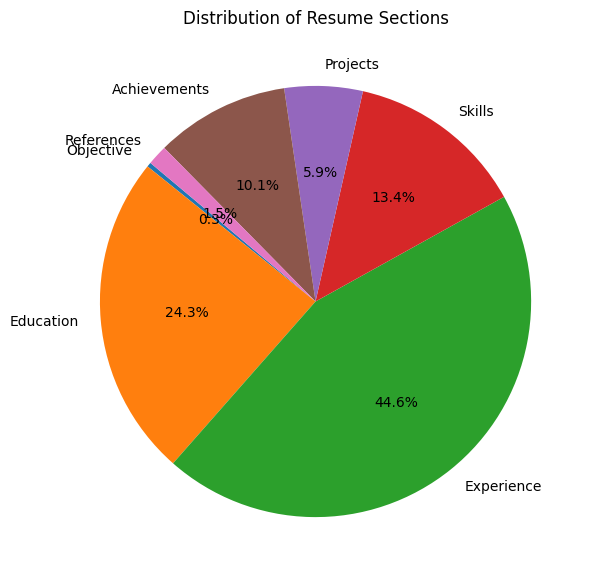

In [55]:
section_counts = {section: len(content.split()) for section, content in sections.items()}  # Count the number of words in each section
plt.figure(figsize=(10, 7))  # Create a figure with a specific size
plt.pie(section_counts.values(), labels=section_counts.keys(), autopct='%1.1f%%', startangle=140)  # Create a pie chart of section distribution
plt.title('Distribution of Resume Sections')  # Set the title of the plot
plt.show()  # Display the plot

In [56]:
# Save section distribution plot

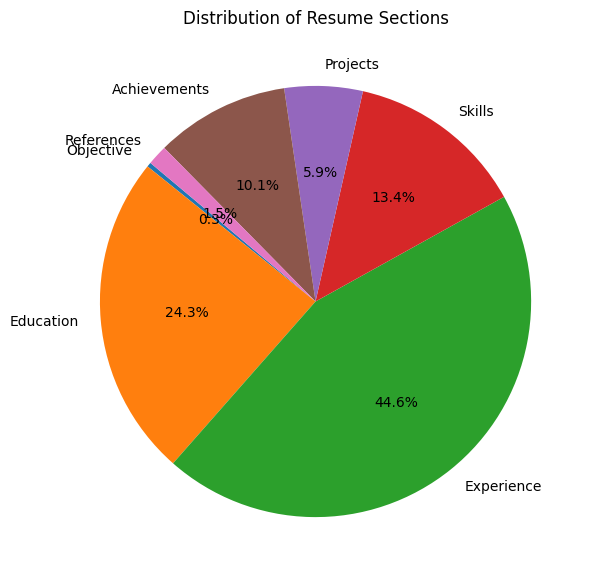

In [57]:
plt.figure(figsize=(10, 7))  # Create a figure with a specific size
plt.pie(section_counts.values(), labels=section_counts.keys(), autopct='%1.1f%%', startangle=140)  # Create a pie chart of section distribution
plt.title('Distribution of Resume Sections')  # Set the title of the plot
plt.savefig(os.path.join(output_dir, 'section_distribution.png'))  # Save the pie chart as an image file

# CONTINUED ANALYSIS

In [63]:
# Define key skills and requirements for a Data Science position

In [64]:
key_skills_data_science = [
    "data science", "python", "machine learning", "statistical analysis", "data analysis",
    "deep learning", "predictive modeling", "sql", "data visualization", "pandas", "numpy",
    "scikit-learn", "r", "data mining", "big data", "data wrangling"
]  # List of key skills for Data Science positions

In [65]:
# Resume text extracted from a sample resume

In [66]:
resume_text = """
    JOHN DOE RESUME

    John Doe
    123 Data Science Lane, Data City, CA, USA
    Email: john.doe@example.com
    GitHub: https://github.com/johndoe

    Objective:
    To leverage my expertise in data science, machine learning, and statistical analysis to drive data-driven decision-making and optimize business processes in a challenging Data Scientist role.

    Education:
    Master of Science in Data Science
    University of Data, Data City, CA, USA
    Graduated: 2023

    Bachelor of Science in Computer Science
    Tech University, Data City, CA, USA
    Graduated: 2021

    Key Skills:
    - Data Science
    - Python (NumPy, Pandas, Scikit-learn)
    - Machine Learning (Classification, Regression, Clustering)
    - Statistical Analysis
    - Deep Learning (TensorFlow, Keras)
    - SQL
    - Data Visualization (Matplotlib, Seaborn)
    - Big Data (Hadoop, Spark)
    - Data Wrangling
    - Predictive Modeling

    Experience:
    Data Scientist
    Innovative Data Solutions
    June 2023 - Present
    - Developed and deployed machine learning models to enhance predictive analytics for client projects.
    - Utilized Python and SQL to analyze and visualize large datasets, providing actionable insights.
    - Collaborated with cross-functional teams to implement data-driven strategies and solutions.
    - Led initiatives in data wrangling, feature engineering, and model tuning to optimize performance.

    Machine Learning Intern
    Tech Innovations Inc.
    June 2022 - May 2023
    - Assisted in building and evaluating machine learning models for various business applications.
    - Performed data preprocessing and feature selection to improve model accuracy.
    - Created data visualizations to present findings and support decision-making processes.

    Projects:
    - Customer Churn Prediction: Developed a machine learning model to predict customer churn, resulting in a 15% improvement in retention strategies.
    - Sales Forecasting: Implemented a time series forecasting model to predict sales trends, achieving a 10% increase in forecast accuracy.

    Certifications:
    - Certified Data Scientist (Data Science Council)
    - Machine Learning Specialization (Coursera)
"""  # Resume text extracted from the example resume

In [67]:
# Function to calculate skill match percentage for Data Science

In [69]:
# Convert resume text to lowercase for case-insensitive matching

In [70]:
text_lower = resume_text.lower()  # Convert all text to lowercase to ensure case-insensitive search

In [71]:
# Total number of key skills

In [72]:
total_skills = len(key_skills_data_science)  # Count the total number of key skills defined

In [73]:
# Count the number of matched skills

In [74]:
matched_skills = sum(1 for skill in key_skills_data_science if re.search(r'\b' + re.escape(skill) + r'\b', text_lower))  # Count skills found in the resume text


In [75]:
# Calculate percentage of matched skills

In [76]:
suitability_percentage_data_science = (matched_skills / total_skills) * 100  # Calculate the percentage of skills that match


In [77]:
# Print the suitability percentage formatted to two decimal places

In [78]:
print(f"Suitability Percentage for Data Science Position: {suitability_percentage_data_science:.2f}%")  # Output the percentage with two decimal places


Suitability Percentage for Data Science Position: 81.25%
